In [44]:
import numpy as np
import pandas as pd
from astropy.nddata import NDDataArray,StdDevUncertainty
import astropy.units as u
import coronagraph as cg
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import importlib

from JacobianVisualizer import *
from JacobianComputer import compute_jacobian

# Information Content

## **1. Load Spectral Grid**

In [45]:
# Load or create reference data path
__reference_data_path__ = os.getenv("TelescopeML_reference_data")

# DataFrame with cols grid points then spectra
train_BD = pd.read_csv(os.path.join(__reference_data_path__,
                                    'training_datasets',
                                    'browndwarf_R100_v4_newWL_v3.csv.bz2'), compression='bz2')
# Wavelength grid of model
wl = pd.read_csv(os.path.join(__reference_data_path__,
                                        'training_datasets',
                                        'wl.csv')).to_numpy().reshape(104)

## **2. Compute Jacobian Matrix**

Compute estimated partial derivatives to fill each cell of the Jacobian matrix.  

In [46]:
temperature_jacobian = compute_jacobian(train_BD,
                                        wl, 
                                        wrt = 'temperature',
                                        save_path = 'jacobians'
                                       )

In [47]:
gravity_jacobian = compute_jacobian(train_BD,
                                        wl, 
                                        wrt = 'gravity',
                                        save_path = 'jacobians'
                                       )

In [48]:
metallicity_jacobian = compute_jacobian(train_BD,
                                        wl, 
                                        wrt = 'metallicity',
                                        save_path = 'jacobians'
                                       )

In [49]:
c_o_ratio_jacobian = compute_jacobian(train_BD,
                                        wl, 
                                        wrt = 'c_o_ratio',
                                        save_path = 'jacobians'
                                       )

## **3. Visualize Jacobian**

Check output by taking a look at the Jacobian value by wavelength, compared to the spectra that determined the estimated partial derivative. 

### Temperature

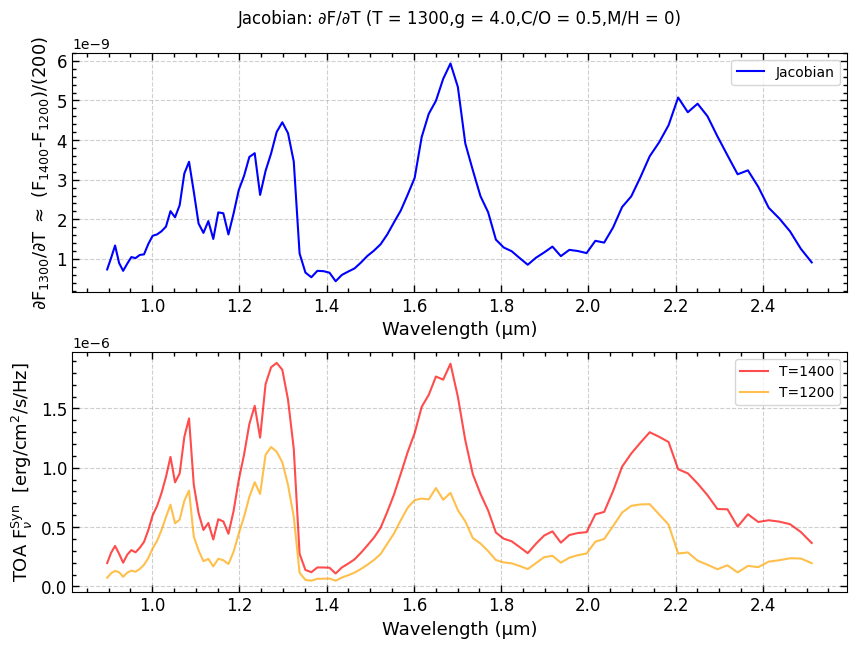

In [65]:
const_dict = {'temperature':1300,
    'gravity':4.0,
    'c_o_ratio':0.5,
    'metallicity':0}

delta_flux_delta_J(temperature_jacobian,
                   "temperature",
                   train_BD, 
                   wl,
                   const_dict = const_dict,
                   logscale=False)

### Gravity

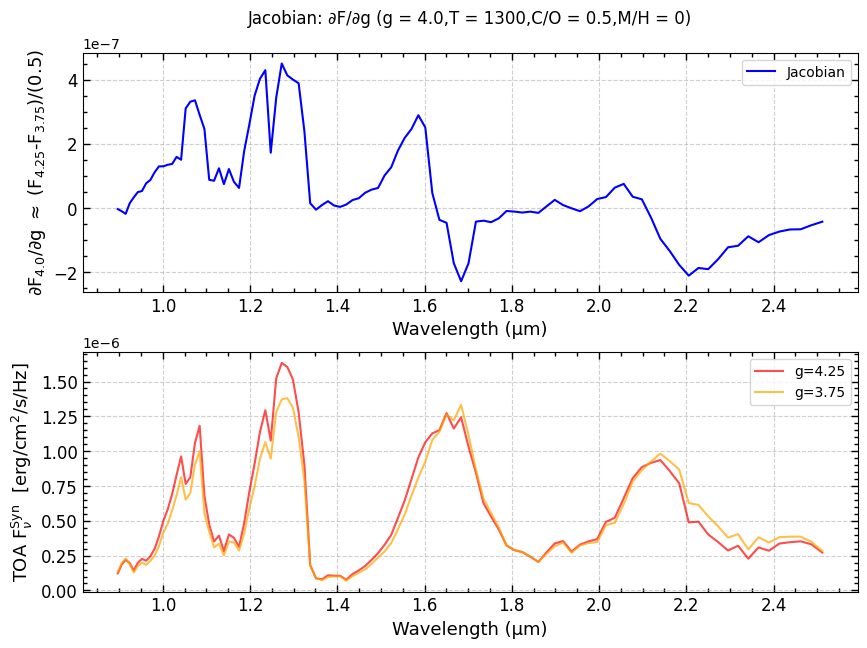

In [66]:
const_dict = {'temperature':1300,
    'gravity':4.0,
    'c_o_ratio':0.5,
    'metallicity':0}

delta_flux_delta_J(gravity_jacobian,
                   "gravity",
                   train_BD, 
                   wl,
                   const_dict = const_dict,
                   logscale=False)

### Metallicity

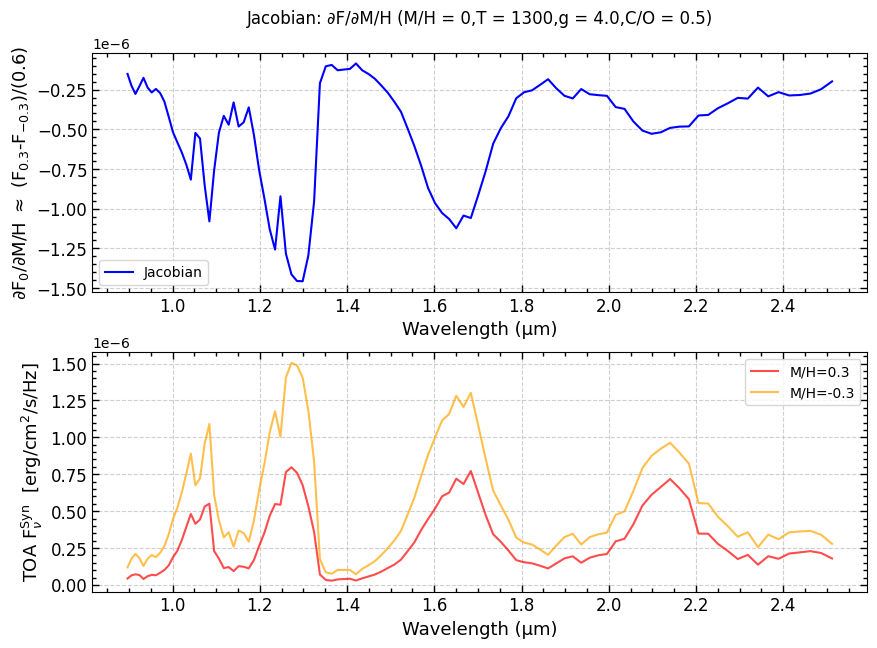

In [67]:
const_dict = {'temperature':1300,
    'gravity':4.0,
    'c_o_ratio':0.5,
    'metallicity':0}

delta_flux_delta_J(metallicity_jacobian,
                   "metallicity",
                   train_BD, 
                   wl,
                   const_dict = const_dict,
                   logscale=False)

### C/O Ratio

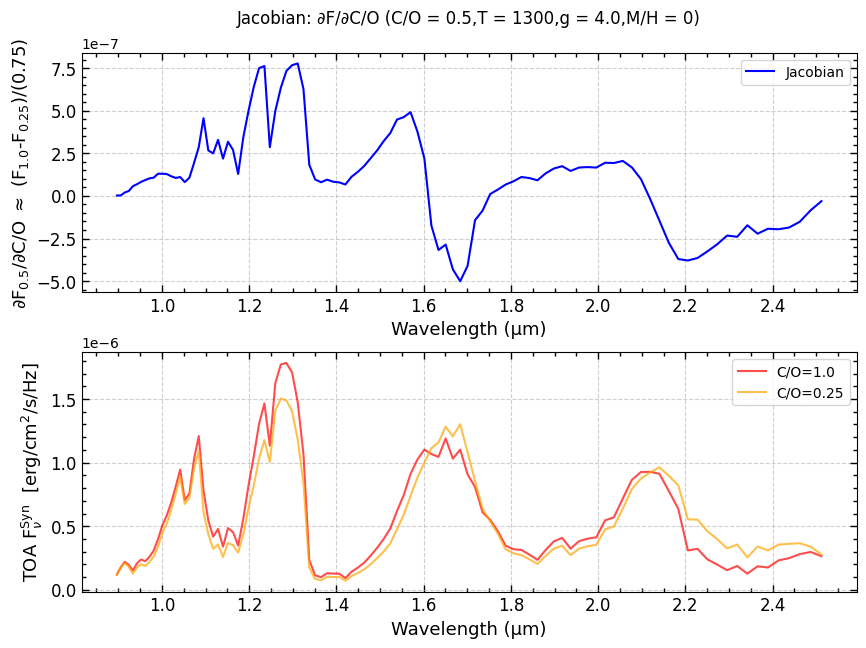

In [68]:
const_dict = {'temperature':1300,
    'gravity':4.0,
    'c_o_ratio':0.5,
    'metallicity':0}

delta_flux_delta_J(c_o_ratio_jacobian,
                   "c_o_ratio",
                   train_BD, 
                   wl,
                   const_dict = const_dict,
                   logscale=False)